In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Setting up enviroment**

In [2]:
!pip install --upgrade tensorflow pandas numpy biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: numpy
    Found existing i

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import Bio

print("✅ Setup complete!")
print("TensorFlow Version:", tf.__version__)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("BioPython Version:", Bio.__version__)

✅ Setup complete!
TensorFlow Version: 2.20.0
NumPy Version: 1.26.4
Pandas Version: 2.2.3
BioPython Version: 1.85


**Getting the data**

In [4]:

# Import necessary libraries
from Bio import Entrez
from Bio import SeqIO
import os

# --- Configuration ---
# NCBI requires you to identify yourself with an email address.
# Replace this with your actual email.
Entrez.email = "ayotunde326@gmail.com"

# The official name of the Lassa virus.
search_term = 'txid3052310[Organism]'

# Define the path where we will save our data within the Kaggle environment.
output_dir = "/kaggle/working/GenomicStoryteller/"
output_file = os.path.join(output_dir, "lassa_virus_genomes.fasta")

# --- Ensure the project directory exists ---
os.makedirs(output_dir, exist_ok=True)
print(f"Data will be saved to: {output_file}")


#   the genomic records
print("Searching NCBI for Lassa virus complete genomes...")
handle = Entrez.esearch(db="nuccore",       # Search the nucleotide database
                        term=search_term,
                        retmax="10000")     # Get up to 10,000 records
record = Entrez.read(handle)
handle.close()
id_list = record["IdList"]
print(f"Found {len(id_list)} records.")


# Fetch the records and save them 
print("Fetching FASTA records...")
# Fetch in batches
batch_size = 200
with open(output_file, "w") as out_handle:
    for start in range(0, len(id_list), batch_size):
        end = min(len(id_list), start + batch_size)
        print(f"  Fetching records {start+1} to {end}...")
        
        # actual data for the IDs in FASTA format
        fetch_handle = Entrez.efetch(db="nuccore",
                                     id=id_list[start:end],
                                     rettype="fasta",
                                     retmode="text")
        
        # Read the data and write it to file
        data = fetch_handle.read()
        fetch_handle.close()
        out_handle.write(data)

print("\n✅ Success! All FASTA files have been downloaded and combined into a single file.")
print(f"You can find your data at: {output_file}")

Data will be saved to: /kaggle/working/GenomicStoryteller/lassa_virus_genomes.fasta
Searching NCBI for Lassa virus complete genomes...
Found 2811 records.
Fetching FASTA records...
  Fetching records 1 to 200...
  Fetching records 201 to 400...
  Fetching records 401 to 600...
  Fetching records 601 to 800...
  Fetching records 801 to 1000...
  Fetching records 1001 to 1200...
  Fetching records 1201 to 1400...
  Fetching records 1401 to 1600...
  Fetching records 1601 to 1800...
  Fetching records 1801 to 2000...
  Fetching records 2001 to 2200...
  Fetching records 2201 to 2400...
  Fetching records 2401 to 2600...
  Fetching records 2601 to 2800...
  Fetching records 2801 to 2811...

✅ Success! All FASTA files have been downloaded and combined into a single file.
You can find your data at: /kaggle/working/GenomicStoryteller/lassa_virus_genomes.fasta


**Preprocessing FASTA files**

In [5]:

# Path to the data we downloaded in the previous step
input_fasta_file = "/kaggle/working/GenomicStoryteller/lassa_virus_genomes.fasta"

# Paths for our new, clean output files
output_dir = "/kaggle/working/GenomicStoryteller/"
corpus_file = os.path.join(output_dir, "lassa_corpus.txt")

print("--- Starting Data Pre-processing ---")

# --- Step 2: Parse the FASTA file and Concatenate Sequences ---
all_sequences = []
# Use Biopython's SeqIO to parse the FASTA file
for record in SeqIO.parse(input_fasta_file, "fasta"):
    # record.seq is a Biopython Seq object, convert it to a string
    all_sequences.append(str(record.seq))

# Join all individual sequences into one massive string (our corpus)
# We use an empty string '' to join them without any separator
corpus = "".join(all_sequences)

print(f"Successfully parsed {len(all_sequences)} sequences.")
print(f"Total characters in corpus: {len(corpus):,}") # The :, adds comma separators for readability

# --- Step 3: Create the Vocabulary and Mappings ---
# Find all unique characters in our corpus
# The set() function automatically finds the unique items
chars = sorted(list(set(corpus)))
vocab_size = len(chars)

print(f"Vocabulary size: {vocab_size}")
print(f"Vocabulary: {chars}")

# Create the character-to-integer mapping (char -> int)
char_to_int = {char: i for i, char in enumerate(chars)}

# Create the integer-to-character mapping (int -> char)
int_to_char = {i: char for i, char in enumerate(chars)}

print("\nCharacter-to-Integer Mapping:")
print(char_to_int)

# --- Step 4: Save the Clean Corpus ---
# Save our massive string to a new, clean text file.
# This is our primary deliverable.
with open(corpus_file, "w") as f:
    f.write(corpus)

print(f"\nClean corpus saved to: {corpus_file}")
print("--- Pre-processing Complete! ---")

# You can now use the `corpus`, `char_to_int`, and `int_to_char` variables
# in the next steps of the project.

--- Starting Data Pre-processing ---
Successfully parsed 2811 sequences.
Total characters in corpus: 9,136,220
Vocabulary size: 11
Vocabulary: ['A', 'C', 'G', 'K', 'M', 'N', 'R', 'S', 'T', 'W', 'Y']

Character-to-Integer Mapping:
{'A': 0, 'C': 1, 'G': 2, 'K': 3, 'M': 4, 'N': 5, 'R': 6, 'S': 7, 'T': 8, 'W': 9, 'Y': 10}

Clean corpus saved to: /kaggle/working/GenomicStoryteller/lassa_corpus.txt
--- Pre-processing Complete! ---


**Training out LSTM model- Data preparation**

In [6]:

import json # We'll use this to save our mappings

# --- Step 1: Load Pre-processed Data ---
# Define the paths to the files we created in the previous step
output_dir = "/kaggle/working/GenomicStoryteller/"
corpus_file = os.path.join(output_dir, "lassa_corpus.txt")

# Load the clean corpus from the text file
with open(corpus_file, 'r') as f:
    corpus = f.read()

# Recreate the vocabulary and mappings.
# This ensures that even if we restart the notebook, we have the correct mappings.
chars = sorted(list(set(corpus)))
vocab_size = len(chars)
char_to_int = {char: i for i, char in enumerate(chars)}
int_to_char = {i: char for i, char in enumerate(chars)}

# Save the mappings for later use, which is a good practice
with open(os.path.join(output_dir, 'mappings.json'), 'w') as f:
    json.dump({'char_to_int': char_to_int, 'int_to_char': int_to_char}, f)

print(f"Corpus length: {len(corpus):,} characters")
print(f"Vocabulary size: {vocab_size}")

# --- Step 2: Define Parameters and Create Sequences ---
# How many characters of context will the model see at a time?
sequence_length = 100

# Lists to hold our input sequences (X) and target characters (y)
sequences = []
targets = []

# Create the sequences using the sliding window method
for i in range(0, len(corpus) - sequence_length):
    input_seq = corpus[i : i + sequence_length]
    target_char = corpus[i + sequence_length]
    sequences.append(input_seq)
    targets.append(target_char)

num_sequences = len(sequences)
print(f"Created {num_sequences:,} training sequences.")

# --- Step 3: Vectorize the Data (Translate to Numbers) ---
# The model needs numbers, not characters. Let's translate.
X = np.zeros((num_sequences, sequence_length), dtype=np.int32)
y = np.zeros((num_sequences), dtype=np.int32)

for i, seq in enumerate(sequences):
    X[i] = [char_to_int[char] for char in seq]
    y[i] = char_to_int[targets[i]]

print("Vectorization complete.")
print(f"Shape of X: {X.shape}") # Should be (num_sequences, 100)
print(f"Shape of y: {y.shape}") # Should be (num_sequences,)

# --- (Optional but Recommended) Save the Prepared Data ---
# For a large corpus, this step can take time.
# Saving the processed data means we don't have to rerun it every time.
np.savez_compressed(
    os.path.join(output_dir, 'training_data.npz'),
    X=X,
    y=y,
    vocab_size=np.array([vocab_size]) # save vocab_size as a numpy array
)

print(f"Training data saved to {os.path.join(output_dir, 'training_data.npz')}")
print("--- Data Preparation Complete! ---")

Corpus length: 9,136,220 characters
Vocabulary size: 11
Created 9,136,120 training sequences.
Vectorization complete.
Shape of X: (9136120, 100)
Shape of y: (9136120,)
Training data saved to /kaggle/working/GenomicStoryteller/training_data.npz
--- Data Preparation Complete! ---


**Load data up**

In [7]:


# Define the path to our processed data
output_dir = "/kaggle/working/GenomicStoryteller/"
training_data_file = os.path.join(output_dir, 'training_data.npz')
mappings_file = os.path.join(output_dir, 'mappings.json')

# Load the training data
with np.load(training_data_file) as data:
    X = data['X']
    y = data['y']
    # vocab_size was saved as an array, so we extract the number
    vocab_size = data['vocab_size'][0]

# Load the mappings
with open(mappings_file, 'r') as f:
    mappings = json.load(f)
    char_to_int = mappings['char_to_int']
    int_to_char = mappings['int_to_char']

print("--- Data Loaded ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Vocabulary size: {vocab_size}")

--- Data Loaded ---
X shape: (9136120, 100)
y shape: (9136120,)
Vocabulary size: 11


**Model Architecture**

In [8]:
# --- Define Model Parameters ---
EMBEDDING_DIM = 128   # The size of the vector for each character
LSTM_UNITS = 256      # The number of memory units in the LSTM layer
SEQUENCE_LENGTH = X.shape[1] # Should be 100 from our previous step

# --- Build the Model ---
model = tf.keras.Sequential([
    # Step 2: The Embedding Layer (The "Translator")
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=EMBEDDING_DIM,
        input_length=SEQUENCE_LENGTH
    ),

    # Step 3: The LSTM Layers (The "Memory Core")
    tf.keras.layers.LSTM(
        LSTM_UNITS,
        return_sequences=True # Crucial for stacking LSTM layers
    ),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(LSTM_UNITS),

    tf.keras.layers.Dropout(0.2),

    # Step 4: The Dense Layer (The "Decision Maker")
    tf.keras.layers.Dense(
        vocab_size,
        activation='softmax'
    )
])

# --- Print the Model Summary ---
print("\n--- Model Architecture ---")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1758675521.859554      19 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758675521.860458      19 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5



--- Model Architecture ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Train Model**

--- Model Compiled ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/5
64239/64239 ━━━━━━━━━━━━━━━━━━━━ 2231s 35ms/step - accuracy: 0.5481 - loss: 1.0282 - val_accuracy: 0.6169 - val_loss: 0.9469
Epoch 2/5
64239/64239 ━━━━━━━━━━━━━━━━━━━━ 2216s 34ms/step - accuracy: 0.8186 - loss: 0.4891 - val_accuracy: 0.7640 - val_loss: 0.6071
Epoch 3/5
64239/64239 ━━━━━━━━━━━━━━━━━━━━ 2206s 34ms/step - accuracy: 0.8624 - loss: 0.3725 - val_accuracy: 0.8083 - val_loss: 0.5004
Epoch 4/5
64239/64239 ━━━━━━━━━━━━━━━━━━━━ 2229s 35ms/step - accuracy: 0.8825 - loss: 0.3224 - val_accuracy: 0.8257 - val_loss: 0.4564
Epoch 5/5
64239/64239 ━━━━━━━━━━━━━━━━━━━━ 2227s 35ms/step - accuracy: 0.8946 - loss: 0.2923 - val_accuracy: 0.8382 - val_loss: 0.4304
--- Model Training Complete ---


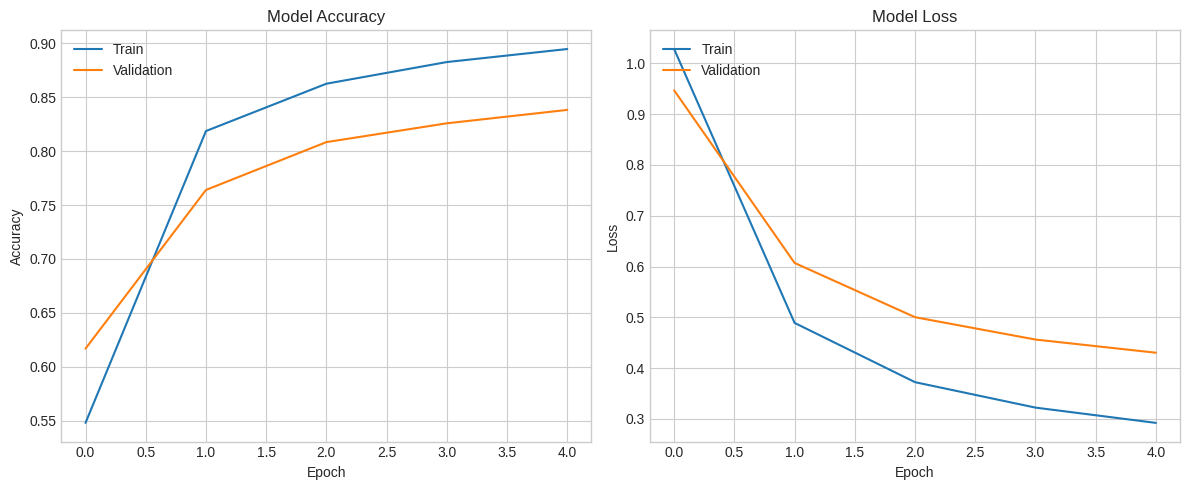


✅ Model saved to /kaggle/working/GenomicStoryteller/genomic_storyteller.h5


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import json

# --- Step 1: Load Data and Rebuild Model ---
# This ensures we can run this cell independently after restarting the notebook
output_dir = "/kaggle/working/GenomicStoryteller/"
training_data_file = os.path.join(output_dir, 'training_data.npz')
mappings_file = os.path.join(output_dir, 'mappings.json')

# Load the training data
with np.load(training_data_file) as data:
    X = data['X']
    y = data['y']
    vocab_size = data['vocab_size'][0]

# --- Re-define the Model Architecture ---
# (It's good practice to have the model definition in the same cell as training)
EMBEDDING_DIM = 128
LSTM_UNITS = 256
SEQUENCE_LENGTH = X.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, EMBEDDING_DIM),
    tf.keras.layers.LSTM(LSTM_UNITS, return_sequences=True),
    tf.keras.layers.LSTM(LSTM_UNITS),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# --- Step 2: Compile the Model ---
# We configure the model's learning process here
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=custom_optimizer,  # Use the new optimizer here
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("--- Model Compiled ---")
model.summary() # Now the summary will show built parameters after compilation

# --- Step 3: Train the Model ---
# This is the main training run. It will be computationally intensive.
EPOCHS = 5  # Start with a moderate number; you can increase this later
BATCH_SIZE = 128 # The number of sequences to process in each batch

print("\n--- Starting Model Training ---")
history = model.fit(
    X, y,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1 # Use 10% of the data for validation
)
print("--- Model Training Complete ---")

# --- Step 4: Plot the Training History ---
# This visualizes how the model's loss and accuracy improved over time
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# --- Step 5: Save the Trained Model ---
# Save the model's learned weights to a file for later use
model.save(os.path.join(output_dir, 'genomic_storyteller.h5'))
print(f"\n✅ Model saved to {os.path.join(output_dir, 'genomic_storyteller.h5')}")